# Preprocessing 

<b>Import Libraries and Data Files</b> 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
from os import chdir, getcwd
wd=getcwd()
chdir('C:\\Users\\eniet\\Documents\\School\\Current\\DSC478\\GROUPPROJECT')

<b>Joining/Stitching the 7 data files</b> <br />
The data files can be downloaded from: <br />
https://www.kaggle.com/c/home-credit-default-risk/data

The data is then Joined and Aggregated using the python file: Load_files_join_data_v2.py<br />
Please note: <br />This python code for joining and aggregating the data run for more than 3 hours. <br />Hence we have exported the aggregated train and test files and the same will be used for further analysis. <br />The aggregated files are attached in the submission.

In [25]:
application_train_comb = pd.read_csv('C:\\Users\\eniet\\Documents\\School\\Current\\DSC478\\GROUPPROJECT\\application_train_agg.csv', sep=',',header =0);

In [26]:
print('Training Data Shape:', application_train_comb.shape)


Training Data Shape: (307511, 376)


<b>Check for Missing Values</b> 

Use fucntion borrowed from Kaggle to view percentage of missing values by column in a table. 
<br> https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction

In [27]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [28]:
missing_values = missing_values_table(application_train_comb)
missing_values.head(20)


Your selected dataframe has 376 columns.
There are 146 columns that have missing values.


,Missing Values,% of Total Values
Prev_FLAG_LAST_APPL_PER_CONTRACT,307511,100.0
Prev_RATE_INTEREST_PRIVILEGED,301943,98.2
Prev_RATE_INTEREST_PRIMARY,301943,98.2
Prev_CCB_AMT_PAYMENT_CURRENT,227533,74.0
Prev_CCB_CNT_DRAWINGS_OTHER_CURRENT,227489,74.0
Prev_CCB_CNT_DRAWINGS_ATM_CURRENT,227489,74.0
Prev_CCB_AMT_DRAWINGS_ATM_CURRENT,227489,74.0
Prev_CCB_CNT_DRAWINGS_POS_CURRENT,227489,74.0
Prev_CCB_AMT_DRAWINGS_OTHER_CURRENT,227489,74.0
Prev_CCB_AMT_DRAWINGS_POS_CURRENT,227489,74.0


Remove columns missing more than 60% of the data and print removed column's name.

In [29]:
app_train = application_train_comb

for name in missing_values.index:
    if missing_values.ix[name][1] > 60:
        print('Dropping column: ', name)
        app_train = app_train.drop(columns=[name])

Dropping column:  Prev_FLAG_LAST_APPL_PER_CONTRACT
Dropping column:  Prev_RATE_INTEREST_PRIVILEGED
Dropping column:  Prev_RATE_INTEREST_PRIMARY
Dropping column:  Prev_CCB_AMT_PAYMENT_CURRENT
Dropping column:  Prev_CCB_CNT_DRAWINGS_OTHER_CURRENT
Dropping column:  Prev_CCB_CNT_DRAWINGS_ATM_CURRENT
Dropping column:  Prev_CCB_AMT_DRAWINGS_ATM_CURRENT
Dropping column:  Prev_CCB_CNT_DRAWINGS_POS_CURRENT
Dropping column:  Prev_CCB_AMT_DRAWINGS_OTHER_CURRENT
Dropping column:  Prev_CCB_AMT_DRAWINGS_POS_CURRENT
Dropping column:  COMMONAREA_MODE
Dropping column:  COMMONAREA_AVG
Dropping column:  COMMONAREA_MEDI
Dropping column:  NONLIVINGAPARTMENTS_MODE
Dropping column:  NONLIVINGAPARTMENTS_AVG
Dropping column:  NONLIVINGAPARTMENTS_MEDI
Dropping column:  FONDKAPREMONT_MODE
Dropping column:  LIVINGAPARTMENTS_AVG
Dropping column:  LIVINGAPARTMENTS_MEDI
Dropping column:  LIVINGAPARTMENTS_MODE
Dropping column:  FLOORSMIN_MODE
Dropping column:  FLOORSMIN_MEDI
Dropping column:  FLOORSMIN_AVG
Dropping c

In [30]:
print('Training Data Shape:', app_train.shape)


Training Data Shape: (307511, 329)


In total 47 columns were removed from the data set(376 - 329 = 47).

In [31]:
app_train.dtypes.value_counts()
df_unique_cnt = pd.DataFrame(columns=['col_name','unique_cnt'])
for col in app_train:
        # If 2 or fewer unique categories
        col_name = col
        unique_cnt = len(list(app_train[col].unique()))
        df_unique_cnt = df_unique_cnt.append({'col_name':col_name,'unique_cnt':unique_cnt},ignore_index=True)

for name,cnt in df_unique_cnt['unique_cnt'].iteritems():
    if cnt == 1:
        coln = df_unique_cnt['col_name'][name]
        print (coln,  app_train[coln].unique().tolist())

Bureau_CREDIT_TYPE_Interbank credit [0.0]
Bureau_CREDIT_TYPE_Loan for purchase of shares (margin lending) [0.0]
Prev_NAME_TYPE_SUITE_nan [0]
Prev_PRODUCT_COMBINATION_nan [0]


Drop columns with zero unique values. 

In [32]:
app_train = app_train.drop(columns=
                           ['Bureau_CREDIT_TYPE_Interbank credit',
                            'Bureau_CREDIT_TYPE_Loan for purchase of shares (margin lending)',
                            'Prev_NAME_TYPE_SUITE_nan',
                            'Prev_PRODUCT_COMBINATION_nan'])

<b>Get Dummy Variables</b>
<br> Recode categorial variables with two classes with label encoding and recode categorical variables with more than two classes with one-hot encoder.

List all binary columns

In [34]:
for name,cnt in df_unique_cnt['unique_cnt'].iteritems():
    if cnt == 2:
        coln = df_unique_cnt['col_name'][name]
        print (coln,  app_train[coln].unique().tolist())

Label Encode

In [35]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le_count = 0

for col in app_train:
    if app_train[col].dtype == 'object':
        
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            
            # Train on the training data
            le.fit(app_train[col])
            
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


One Hot Encoder

In [36]:
app_train = pd.get_dummies(app_train)

In [37]:
print('Training Features shape: ', app_train.shape)

Training Features shape:  (307511, 440)


<b>Correct Negative Numbers</b>

In [38]:
app_train.columns[(app_train < 0).any()]

Index(['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'DAYS_LAST_PHONE_CHANGE', 'Bureau_DAYS_CREDIT',
       'Bureau_DAYS_CREDIT_ENDDATE', 'Bureau_DAYS_ENDDATE_FACT',
       'Bureau_AMT_CREDIT_SUM_DEBT', 'Bureau_AMT_CREDIT_SUM_LIMIT',
       'Bureau_DAYS_CREDIT_UPDATE', 'Bureau_Balance_MONTHS_BALANCE',
       'Prev_AMT_DOWN_PAYMENT', 'Prev_RATE_DOWN_PAYMENT', 'Prev_DAYS_DECISION',
       'Prev_SELLERPLACE_AREA', 'Prev_DAYS_FIRST_DRAWING',
       'Prev_DAYS_FIRST_DUE', 'Prev_DAYS_LAST_DUE_1ST_VERSION',
       'Prev_DAYS_LAST_DUE', 'Prev_DAYS_TERMINATION',
       'Prev_POS_MONTHS_BALANCE', 'Prev_IP_DAYS_INSTALMENT',
       'Prev_IP_DAYS_ENTRY_PAYMENT'],
      dtype='object')

In [40]:
app_train['Prev_DAYS_FIRST_DUE'].describe()

count    306848.000000
mean      13396.851488
std       37743.709954
min       -2891.000000
25%       -1336.000000
50%        -897.250000
75%        -420.000000
max      365243.000000
Name: Prev_DAYS_FIRST_DUE, dtype: float64

In [41]:
#Convert Days to positive numbers
app_train['DAYS_BIRTH'] = round((app_train['DAYS_BIRTH'] * (-1))/365)

app_train['DAYS_EMPLOYED'] = abs(app_train['DAYS_EMPLOYED'])

app_train['DAYS_REGISTRATION'] = abs(app_train['DAYS_REGISTRATION'])

app_train['DAYS_ID_PUBLISH'] = abs(app_train['DAYS_ID_PUBLISH'])

app_train['DAYS_LAST_PHONE_CHANGE'] = abs(app_train['DAYS_LAST_PHONE_CHANGE'])

app_train['Bureau_DAYS_CREDIT'] = abs(app_train['Bureau_DAYS_CREDIT'])

app_train['Bureau_DAYS_ENDDATE_FACT'] = abs(app_train['Bureau_DAYS_ENDDATE_FACT'])

app_train['Bureau_DAYS_CREDIT_UPDATE'] = abs(app_train['Bureau_DAYS_CREDIT_UPDATE'])

app_train['Prev_DAYS_DECISION'] = abs(app_train['Prev_DAYS_DECISION'])

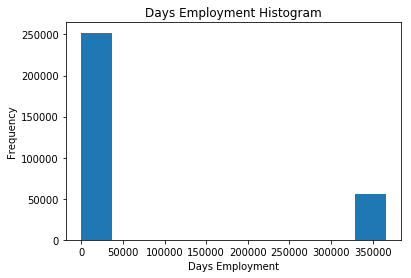

In [42]:
app_train['DAYS_EMPLOYED'].describe()
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [43]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243


In [44]:
# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)


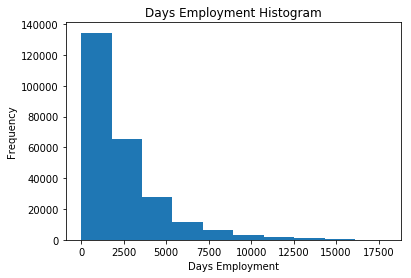

In [45]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

<b> Handling Missing Values - Imputation</b>
    <br>After removing columns missing 60%+ of values, replace missing values with Median 

In [46]:
from sklearn.preprocessing import MinMaxScaler, Imputer

In [47]:
#isolate target from target data
target_var = app_train['TARGET']
# Drop the target from the training data and SK_ID_CURR
if 'TARGET' in app_train:
    train = app_train.drop(columns = ['TARGET','SK_ID_CURR'])
else:
    train = app_train.copy()

In [48]:
#get list of col names
features = list(train.columns)

In [50]:
# Median imputation of missing values
imputer = Imputer(strategy = 'median')

In [51]:
# Fit on the training data
imputer.fit(train)
train = imputer.transform(train)

<b>Normalize Data</b>
<br> Scale data using 0-1 MinMax Scaler

In [52]:
scaler = MinMaxScaler(feature_range = (0, 1))

In [53]:
scaler.fit(train)
train = scaler.transform(train)

In [54]:
print('Training data shape: ', train.shape)

Training data shape:  (307511, 439)


### Feature Importance

Use Random Forest Classifier to find feature importance and plot using plot_feature_importance function.

In [56]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [57]:
# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [58]:
# Train on the training data
random_forest.fit(train, target_var)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.9min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=50, verbose=1, warm_start=False)

In [59]:
# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})


Use fucntion borrowed from Kaggle to view plotted feature importance.
https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction

In [60]:
def plot_feature_importances(df):

# Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:100]))), 
            df['importance_normalized'].head(100), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:100]))))
    ax.set_yticklabels(df['feature'].head(100))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

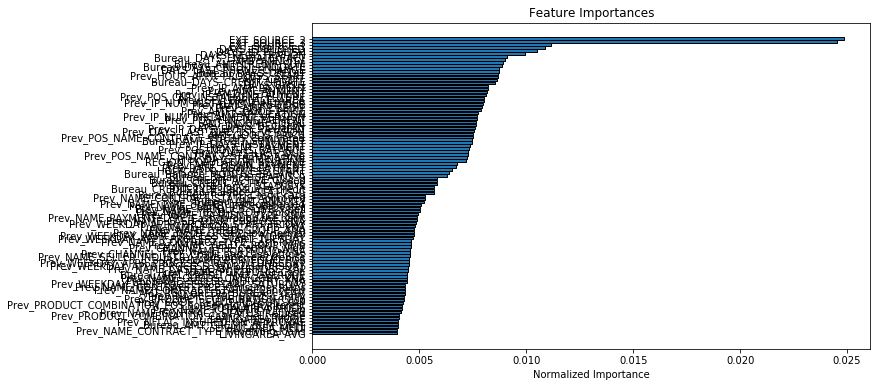

In [61]:
feature_importances_sorted = plot_feature_importances(feature_importances)

### Feature Reduction

In [62]:
train_reduced = pd.DataFrame(train)
train_reduced.columns = features

In [63]:
for feature in feature_importances_sorted['feature'][121:]:
    print ("Dropping feature: ",feature)
    train_reduced = train_reduced.drop(columns = [feature])

Dropping feature:  Prev_POS_NAME_CONTRACT_STATUS_Signed
Dropping feature:  LANDAREA_AVG
Dropping feature:  Prev_PRODUCT_COMBINATION_Card Street
Dropping feature:  Prev_NAME_PRODUCT_TYPE_walk-in
Dropping feature:  Prev_PRODUCT_COMBINATION_Card X-Sell
Dropping feature:  BASEMENTAREA_MEDI
Dropping feature:  Prev_NAME_GOODS_CATEGORY_Audio/Video
Dropping feature:  BASEMENTAREA_AVG
Dropping feature:  Prev_DAYS_FIRST_DRAWING
Dropping feature:  Bureau_Balance_STATUS_1
Dropping feature:  Prev_CHANNEL_TYPE_Regional / Local
Dropping feature:  BASEMENTAREA_MODE
Dropping feature:  Prev_PRODUCT_COMBINATION_Cash X-Sell: high
Dropping feature:  CNT_FAM_MEMBERS
Dropping feature:  Prev_CHANNEL_TYPE_Contact center
Dropping feature:  Prev_NAME_CLIENT_TYPE_Refreshed
Dropping feature:  Prev_NAME_YIELD_GROUP_low_action
Dropping feature:  Prev_POS_SK_DPD_DEF
Dropping feature:  Prev_PRODUCT_COMBINATION_POS household without interest
Dropping feature:  Prev_NAME_TYPE_SUITE_Spouse, partner
Dropping feature:  NON

Dropping feature:  ORGANIZATION_TYPE_Transport: type 4
Dropping feature:  NAME_INCOME_TYPE_State servant
Dropping feature:  ORGANIZATION_TYPE_Trade: type 3
Dropping feature:  FLAG_EMP_PHONE
Dropping feature:  NAME_EDUCATION_TYPE_Incomplete higher
Dropping feature:  ORGANIZATION_TYPE_Business Entity Type 1
Dropping feature:  FLAG_DOCUMENT_6
Dropping feature:  DAYS_EMPLOYED_ANOM
Dropping feature:  FLAG_DOCUMENT_5
Dropping feature:  ORGANIZATION_TYPE_Agriculture
Dropping feature:  Prev_NAME_CASH_LOAN_PURPOSE_Buying a home
Dropping feature:  ORGANIZATION_TYPE_XNA
Dropping feature:  OCCUPATION_TYPE_High skill tech staff
Dropping feature:  ORGANIZATION_TYPE_Security
Dropping feature:  Prev_NAME_CASH_LOAN_PURPOSE_Buying a new car
Dropping feature:  AMT_REQ_CREDIT_BUREAU_DAY
Dropping feature:  Bureau_CREDIT_CURRENCY_currency 1
Dropping feature:  ORGANIZATION_TYPE_Medicine
Dropping feature:  ORGANIZATION_TYPE_School
Dropping feature:  NAME_TYPE_SUITE_Children
Dropping feature:  Bureau_CREDIT_CU

### Split Train and Test Sets

Use 80/20 split for Training and Test sets.

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
data_train, data_test, target_train, target_test = train_test_split (train_reduced, target_var, test_size =0.2, random_state = 29)

In [69]:
print('Training set shape:       ', data_train.shape)
print('Test set shape:           ', data_test.shape)
print('Training Target set shape:', target_train.shape)
print('Test Target shape:        ', target_test.shape)

Training set shape:        (246008, 121)
Test set shape:            (61503, 121)
Training Target set shape: (246008,)
Test Target shape:         (61503,)


# Model Building  

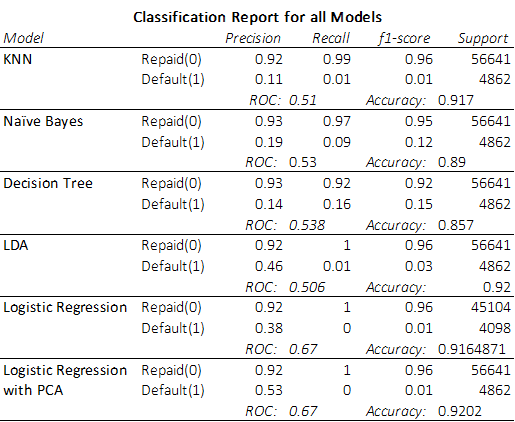

#### KNN

In [70]:
from sklearn import neighbors

In [71]:
n_neighbors = 5

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance', n_jobs = -1)
knnclf.fit(data_train, target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='distance')

In [ ]:
knnpred_test = knnclf.predict(data_test)

In [ ]:
#Check Accuracy
from sklearn.metrics import classification_report
print(classification_report(target_test, knnpred_test))

In [ ]:
#ROC_AUC
from sklearn.metrics import roc_auc_score
roc_auc_score(target_test, knnpred_test)

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
knncm = confusion_matrix(target_test, knnpred_test)
print (knncm)

In [ ]:
import pylab as plt
%matplotlib inline
plt.matshow(knncm)
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
#Accuracy of test data
print (knnclf.score(data_test, target_test))

#Accuracy of train data
print (knnclf.score(data_train, target_train))

#### Naive Bayes

In [ ]:
from sklearn import tree, naive_bayes
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(data_train, target_train)

In [ ]:
from sklearn.model_selection import cross_validate
cv_scores_nb = cross_validate(nbclf, data_train, target_train, cv=10, return_train_score=True)
cv_scores_nb
print("Accuracy Using Cross Validation: %0.2f (+/- %0.2f)" % (cv_scores_nb['test_score'].mean(), cv_scores_nb['test_score'].std() * 2))


In [ ]:
nbpred_test = nbclf.predict(data_test)

In [ ]:
#Check Accuracy
from sklearn.metrics import classification_report
print(classification_report(target_test, nbpred_test))

In [ ]:
#ROC_AUC
from sklearn.metrics import roc_auc_score
roc_auc_score(target_test, nbpred_test)

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
nbcm = confusion_matrix(target_test, nbpred_test)
print (nbcm)

In [ ]:
import pylab as plt
%matplotlib inline
plt.matshow(nbcm)
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
#Accuracy of test data
print (nbclf.score(data_test, target_test))

#### Decision Tree

In [ ]:
from sklearn import tree, naive_bayes
treeclf =  tree.DecisionTreeClassifier(criterion='entropy',random_state=10)
treeclf = treeclf.fit(data_train, target_train)


In [ ]:
cv_scores_tree = cross_validate(treeclf, data_train, target_train, cv=10, return_train_score=True)
cv_scores_tree
print("Accuracy Using Cross Validation: %0.2f (+/- %0.2f)" % (cv_scores_tree['test_score'].mean(), cv_scores_tree['test_score'].std() * 2))


In [ ]:
treepred_test = treeclf.predict(data_test)

In [ ]:

#Check Accuracy
from sklearn.metrics import classification_report
print(classification_report(target_test, treepred_test))

In [ ]:
#ROC_AUC
from sklearn.metrics import roc_auc_score
roc_auc_score(target_test, treepred_test)

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
treecm = confusion_matrix(target_test, treepred_test)
print (treecm)

In [ ]:
import pylab as plt
%matplotlib inline
plt.matshow(treecm)
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
#Accuracy of test data
print (treeclf.score(data_test, target_test))

In [ ]:
#Visualization of Tree
import graphviz
from sklearn.tree import export_graphviz

In [ ]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy',max_depth = 4)

In [ ]:
cv_scores_tree = cross_validate(treeclf,  data_train, target_train, cv=10, return_train_score=True)
cv_scores_tree
print("Accuracy Using Cross Validation: %0.2f (+/- %0.2f)" % (cv_scores_tree['test_score'].mean(), cv_scores_tree['test_score'].std() * 2))


In [ ]:
treeclf = treeclf.fit(data_train, target_train)
export_graphviz(treeclf, out_file="tree.dot", feature_names = data_train.columns, class_names=["0", "1"])
with open("tree.dot") as f:
        dot_graph = f.read()
graphviz.Source(dot_graph)

#### LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
ldclf = LinearDiscriminantAnalysis()
ldclf = ldclf.fit(data_train, target_train)

In [ ]:
cv_scores_ld = cross_validate(ldclf, data_train, target_train, cv=10, return_train_score=True)
cv_scores_ld
print("Accuracy Using Cross Validation: %0.2f (+/- %0.2f)" % (cv_scores_ld['test_score'].mean(), cv_scores_ld['test_score'].std() * 2))


In [ ]:
ldpred_test = ldclf.predict(data_test)

In [ ]:
#Check Accuracy
from sklearn.metrics import classification_report
print(classification_report(target_test, ldpred_test))

In [ ]:
#ROC_AUC
from sklearn.metrics import roc_auc_score
roc_auc_score(target_test, ldpred_test)


In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
ldcm = confusion_matrix(target_test, ldpred_test)
print (ldcm)

In [ ]:
import pylab as plt
%matplotlib inline
plt.matshow(ldcm)
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(

In [ ]:
#Accuracy of test data
print (ldclf.score(data_test, target_test))

#### Logistic Regression

In [ ]:
import sklearn.decomposition as skdc
import sklearn.linear_model as sklm

In [ ]:
pca = skdc.PCA() #empty model space
pcafit = pca.fit_transform(data_train,target_train) ##apply dimensionality reduction to X
var_explained = pca.explained_variance_ratio_ #ratio of variance each PC explains

In [ ]:
print(pd.Series(var_explained))
###All components are not necessary
###since they explain less than.01 of the variance
print(sum(var_explained[0:46]))
##indeed,the first 46 PCs explain 95% of the variance
import sklearn.pipeline as skpl
pca = skdc.PCA(n_components = 46) #only include first 10 components

In [ ]:
logreg = sklm.LogisticRegression(class_weight='balance')#empty model space
pipeline = skpl.Pipeline([('pca', pca), ('logistic', logreg)]) #create pipeline from pca to logregression space
fit = pipeline.fit(data_train, target_train) #fit model
prediction = pipeline.predict(data_test)

In [ ]:
print(prediction)
print(classification_report(target_test, prediction))
print(accuracy_score(target_test, prediction))


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(target_test, prediction)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
#ROC_AUC
from sklearn.metrics import roc_auc_score
roc_auc_score(target_test, prediction)

In [ ]:
print("Accuracy:",metrics.accuracy_score(target_test, prediction))
print("Precision:",metrics.precision_score(target_test, prediction))
print("Recall:",metrics.recall_score(target_test, prediction))

In [ ]:
y_pred_proba = pipeline.predict_proba(data_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(target_test,  y_pred_proba)
auc = metrics.roc_auc_score(target_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc=4)
plt.show()

#### Logistic Regression w/ PCA

In [ ]:
import sklearn.decomposition as skdc
import sklearn.linear_model as sklm


In [ ]:
pca = skdc.PCA() #empty model space
pcafit = pca.fit_transform(data_train,target_train) ##apply dimensionality reduction to X
var_explained = pca.explained_variance_ratio_ #ratio of variance each PC explains


In [ ]:
print(pd.Series(var_explained))
###All components are not necessary
###since they explain less than.01 of the variance
print(sum(var_explained[0:46]))
##indeed,the first 46 PCs explain 95% of the variance
import sklearn.pipeline as skpl
pca = skdc.PCA(n_components = 46) #only include first 10 components


In [ ]:
logreg = sklm.LogisticRegression(class_weight='balance')#empty model space
pipeline = skpl.Pipeline([('pca', pca), ('logistic', logreg)]) #create pipeline from pca to logregression space
fit = pipeline.fit(data_train, target_train) #fit model
prediction = pipeline.predict(data_test)


In [ ]:
print(prediction)
print(classification_report(target_test, prediction))
print(accuracy_score(target_test, prediction))


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(target_test, prediction)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
#ROC_AUC
from sklearn.metrics import roc_auc_score
roc_auc_score(target_test, prediction)

In [ ]:
print("Accuracy:",metrics.accuracy_score(target_test, prediction))
print("Precision:",metrics.precision_score(target_test, prediction))
print("Recall:",metrics.recall_score(target_test, prediction))


In [ ]:
y_pred_proba = pipeline.predict_proba(data_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(target_test,  y_pred_proba)
auc = metrics.roc_auc_score(target_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc=4)
plt.show()